# Pymaceuticals Inc.
---

### Analysis

- No matter the sex of the mouse, the tumor size can still increase of decrease. However Capomulin and Ramicane drug regimen had made lower tumor volumes over time, especially capomulin. Also the weight of the mouse was directly correlated to the tumor volume according to these charts and tables below.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
newmerge_df = merge_df.sort_values("Timepoint")
# Checking the number of mice. 
# length # is the answer
print(merge_df["Mouse ID"].nunique())

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
new_df = merge_df.loc[merge_df["Mouse ID"] != 'g989']
print(new_df["Mouse ID"].nunique())

248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
mean = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median =new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance =new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem =new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Summarystats= pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Variance Tumor Volume": variance,
                           "Standard Deviation Tumor Volume": stdv, "SEM Tumor Volume": sem})
Summarystats


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [7]:
drugs = new_df["Drug Regimen"].value_counts()

Text(0.5, 0, 'Drug Regimen')

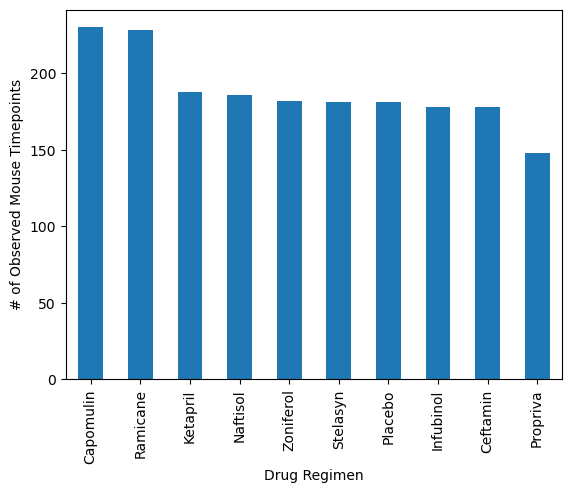

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")

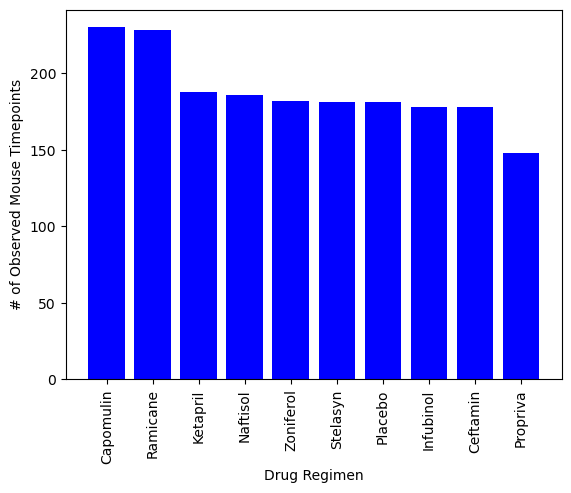

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using  pyplot.
plt.bar(drugs.index,drugs.values, color="blue", align="center")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

In [13]:
people=new_df["Sex"].value_counts()

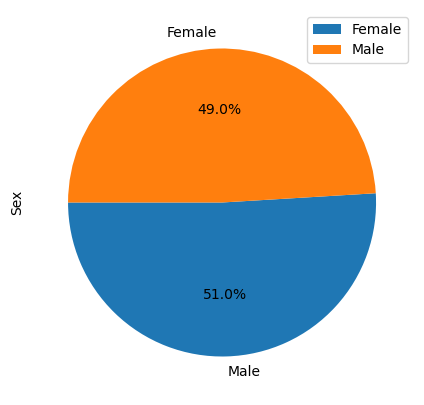

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = people.plot.pie(figsize=(5,5), startangle=180, 
                      explode = (0, 0), autopct="%1.1f%%")
pie.legend(["Female", "Male"], prop={'size': 10})
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_timepoint = new_df[new_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"])]
mouse_timepoint = mouse_timepoint.sort_values(["Timepoint"], ascending=True)

# Start by getting the last (greatest) timepoint for each mouse
dataframe = mouse_timepoint.merge(new_df, on=["Mouse ID", "Timepoint"], how ="left" )
dataframe
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data = mouse_timepoint[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
1613,Ceftamin,x226,0,45.000000
1488,Ceftamin,x581,0,45.000000
1478,Ceftamin,a275,0,45.000000
1468,Ceftamin,k210,0,45.000000
...,...,...,...,...
1824,Capomulin,g316,45,40.159220
1477,Ceftamin,k210,45,68.923185
460,Ramicane,j913,45,31.560470
1497,Ceftamin,x581,45,64.634949


In [39]:
capomulin_data = new_df.loc[new_df["Drug Regimen"] == "Capomulin",:]
ramicane_data = new_df.loc[new_df["Drug Regimen"] == "Ramicane", :]
infubinol_data = new_df.loc[new_df["Drug Regimen"] == "Infubinol", :]
ceftamin_data = new_df.loc[new_df["Drug Regimen"] == "Ceftamin", :]

In [67]:
#Capomulin 
capomulin_last = capomulin_data.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = capomulin_vol.merge(new_df, on=("Mouse ID", "Timepoint"), how="left")


#Ramicane
ramicane_last = ramicane_data.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = ramicane_vol.merge(new_df, on=("Mouse ID", "Timepoint"), how="left")


#infubinol
infubinol_last = infubinol_data.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = infubinol_vol.merge(new_df, on=('Mouse ID', 'Timepoint'), how="left")


#Ceftamin
ceftamin_last = ceftamin_data.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = ceftamin_vol.merge(new_df, on=('Mouse ID', 'Timepoint'), how ="left")



In [70]:
#calculating IQR & quantitative for capomulin
volume = capomulin_merge['Tumor Volume (mm3)']
quartiles = volume.quantile([0.25,0.5,0.75])
capomulin_lowerq = quartiles[0.25]
capomulin_upperq = quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - 1.5*capomulin_iqr
capomulin_upper_bound = capomulin_upperq + 1.5*capomulin_iqr

#calculating IQR & quantitative for Ramicane
volume2= ramicane_merge['Tumor Volume (mm3)']
quartiles = volume2.quantile([0.25,0.5,0.75])
ramicane_lowerq =quartiles[0.25]
ramicane_upperq =quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound= ramicane_lowerq -1.5*ramicane_iqr
ramicane_upper_bound = ramicane_upperq + 1.5*ramicane_iqr

#calculating IQR & quantitative for Infubinol
volume3= infubinol_merge['Tumor Volume (mm3)']
quartiles = volume3.quantile([0.25,0.5,0.75])
infubinol_lowerq= quartiles[0.25]
infubinol_upperq = quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - 1.5*infubinol_iqr
infubinol_upper_bound = infubinol_upperq + 1.5*infubinol_iqr

#calculating IQR & quantitative for Ceftamin
volume4 = ceftamin_merge['Tumor Volume (mm3)']
quartiles = volume4.quantile([0.25,0.5,0.75])
ceftamin_lowerq= quartiles[0.25]
ceftamin_upperq = quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - 1.5*ceftamin_iqr
ceftamin_upper_bound = ceftamin_upperq + 1.5*ceftamin_iqr


In [71]:

    # Determine outliers using upper and lower bounds
print(f"Infubinol values below {infubinol_lower_bound} and above {infubinol_upper_bound} could be outliers.")
print(f"ceftamin values below {ceftamin_lower_bound} and above {ceftamin_upper_bound} could be outliers.")
print(f"Ramicane values below {ramicane_lower_bound} and above {ramicane_upper_bound} could be outliers.")
print(f"capomulin values below {capomulin_lower_bound} and above {capomulin_upper_bound} could be outliers.")

Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers.
ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers.
Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers.
capomulin values below 20.70456164999999 and above 51.83201549 could be outliers.


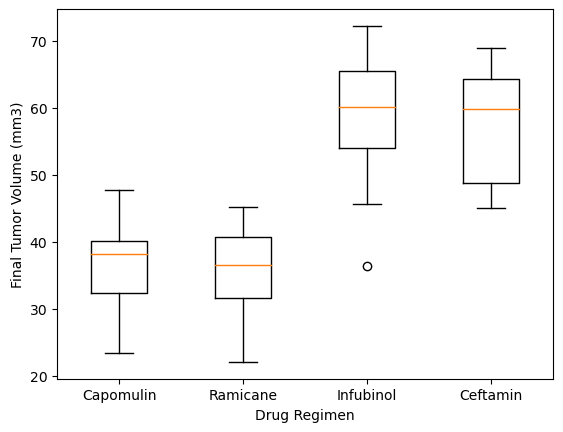

In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [volume, volume2, volume3, volume4]
labels=["Capomulin","Ramicane","Infubinol","Ceftamin",]

plt.boxplot(treatments, labels = labels)
plt.xlabel("Drug Regimen")
plt.ylabel('Final Tumor Volume (mm3)')
plt.savefig('boxplot')
    
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.show()

## Line and Scatter Plots

In [25]:
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


<function matplotlib.pyplot.show(close=None, block=None)>

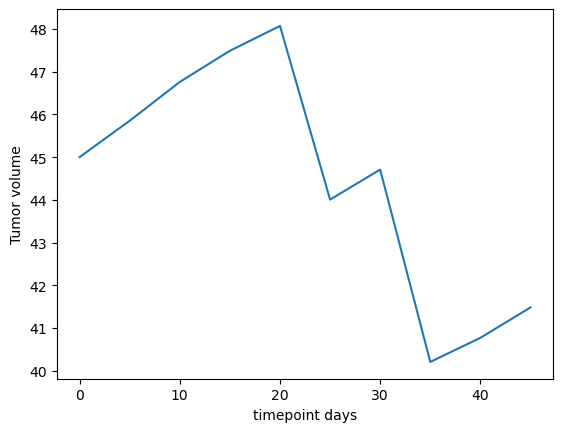

In [76]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

single_mouse = new_df.loc[(new_df["Drug Regimen"] == 'Capomulin')&(new_df['Mouse ID'] == 'l509')]
y_axis = single_mouse["Tumor Volume (mm3)"]
x_axis = single_mouse["Timepoint"]

plt.plot(x_axis, y_axis)
plt.xlabel("timepoint days")
plt.ylabel("Tumor volume")
plt.show

In [24]:
new_df.loc[new_df["Drug Regimen"] == 'Capomulin']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


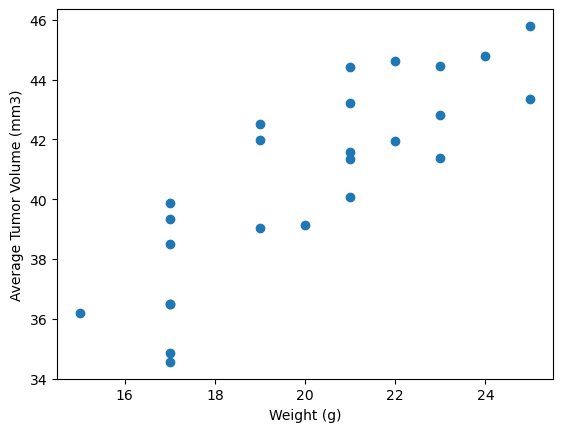

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatplot_df = new_df.loc[new_df["Drug Regimen"] == 'Capomulin'].groupby(["Weight (g)", "Mouse ID"])["Tumor Volume (mm3)"].mean().reset_index()

x_axis = scatplot_df["Weight (g)"]
y_axis = scatplot_df["Tumor Volume (mm3)"]
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(x_axis,y_axis)

## Correlation and Regression

 The correlation coefficient between weight and tumor volume is 0.84


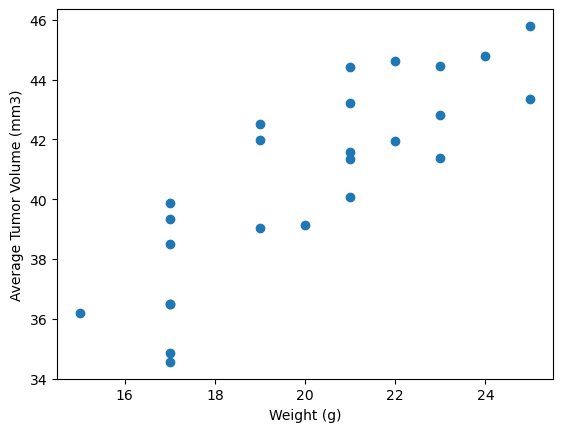

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

scatplot_df = new_df.loc[new_df["Drug Regimen"] == 'Capomulin'].groupby(["Weight (g)", "Mouse ID"])["Tumor Volume (mm3)"].mean().reset_index()

x_axis = scatplot_df["Weight (g)"]
y_axis = scatplot_df["Tumor Volume (mm3)"]
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(x_axis,y_axis)
print(f' The correlation coefficient between weight and tumor volume is {round(st.pearsonr(x_axis, y_axis)[0],2)}') 